Imports and Reading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

start = time.process_time()
df = pd.read_excel("online_retail2.xlsx")

In [15]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,WeekDay,Money,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,Friday,14.85,2011-12-09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      406830 non-null  object        
 1   StockCode    406830 non-null  object        
 2   Description  406830 non-null  object        
 3   Quantity     406830 non-null  int64         
 4   InvoiceDate  406830 non-null  datetime64[ns]
 5   Price        406830 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      406830 non-null  object        
 8   WeekDay      406830 non-null  object        
 9   Money        406830 non-null  float64       
 10  Date         406830 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 37.2+ MB


Invoice Date info is converted to Weekdays info for the task "Average Number of Orders each Week Day"

In [ ]:
df["WeekDay"]=df["InvoiceDate"].dt.weekday
df.dropna(inplace=True)
df.loc[df["WeekDay"] == 0, "WeekDay"]="Monday"
df.loc[df["WeekDay"] == 1, "WeekDay"]="Tuesday"
df.loc[df["WeekDay"] == 2, "WeekDay"]="Wednesday"
df.loc[df["WeekDay"] == 3, "WeekDay"]="Thursday"
df.loc[df["WeekDay"] == 4, "WeekDay"]="Friday"
df.loc[df["WeekDay"] == 5, "WeekDay"]="Saturday"
df.loc[df["WeekDay"] == 6, "WeekDay"]="Sunday"
df["Money"]=df["Quantity"]*df["Price"]

df["Date"] = df["InvoiceDate"].dt.date

TASK 1: Top 10 Products that ordered by Individuals

In [65]:
def Top10Products():
    df2=df[["Description","Quantity"]]
    df2=df2.groupby(["Description"]).sum().reset_index()
    df2=df2.sort_values("Quantity",ascending=False).head(10)
    print("1)Top 10 products ordered by individuals:")
    return df2

In [66]:
Top10Products()

1)Top 10 products ordered by individuals:


,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409
2612,POPCORN HOLDER,30504
2669,RABBIT NIGHT LIGHT,27094
2057,MINI PAINT SET VINTAGE,25880
2245,PACK OF 12 LONDON TISSUES,25321
2277,PACK OF 60 PINK PAISLEY CAKE CASES,24163


TASK 2: Top 10 Customers who Spent the Most Amount of Money

In [46]:
def Top10CustomersWhoSpentMostMoney():

    CustomersSpendings = pd.DataFrame(df["Price"]*df["Quantity"],columns = ["TotalSpending"])
    CustomersSpendings["Customer ID"] =df["Customer ID"]
    Listof = pd.DataFrame(CustomersSpendings.groupby("Customer ID").sum())
    Sorted = Listof.sort_values("TotalSpending",ascending = False)
    RESULT = Sorted.head(n=10)
    print("Here is the list of Top 10 customers who spent the most amount of  money : ")
    return RESULT

In [47]:
Top10CustomersWhoSpentMostMoney()

Here is the list of Top 10 customers who spent the most amount of  money : 


,TotalSpending
Customer ID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


TASK 3: Top 5 Dates in which the Greatest Number of Orders Were Placed

In [63]:
def Top5Dates():
    DateGroup = df.groupby(["Date"])
    List =pd.DataFrame(DateGroup.nunique())
    sortedlist = List["Invoice"].sort_values(ascending = False)
    top5 = sortedlist.head(5)
    print("3) Top 5 dates in which the greatest number of orders were placed: ")
    return top5


In [67]:
Top5Dates()

3) Top 5 dates in which the greatest number of orders were placed: 


Date
2011-10-06    180
2011-12-01    164
2011-11-10    161
2010-12-02    160
2011-11-17    154
Name: Invoice, dtype: int64

TASK 4: Average Number of Orders for Each Day of the Week

In [11]:
def AverageNumbersOfOrdersEachDay():
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Sunday"]
    print("4) Average Numbers Of Orders Each Day: ")
    for i in days:
        df5 = df[["WeekDay", "Invoice", "Date"]]
        df5 = df5.drop_duplicates("Invoice")
        df5 = df5.loc[df5["WeekDay"] == i]
        df5 = df5.groupby("Date").count()
        df5 = df5.reset_index()
        df5["WeekDay"] = pd.to_datetime(df5["Date"]).dt.weekday
        df5 = df5.groupby("WeekDay").mean().reset_index()
        df5 = df5["Invoice"]
        print("Average number of orders placed on", i, ":", int(df5))

In [12]:
AverageNumbersOfOrdersEachDay()

4) Average Numbers Of Orders Each Day: 
Average number of orders placed on Monday : 74
Average number of orders placed on Tuesday : 74
Average number of orders placed on Wednesday : 77
Average number of orders placed on Thursday : 93
Average number of orders placed on Friday : 67
Average number of orders placed on Sunday : 46


TASK 5: Most Ordered Product for an Specific Date according to User's input

In [19]:
def MostOrderedProductForSpecificDate():
    while True:
        year = int(input("Please enter year: "))
        if year < 2010 or year > 2011:
            print("Please enter 2010 or 2011")
            continue
        break
    while True:
        month = int(input("Please enter month: "))
        if month < 1 or month > 12:
            print("Enter a number between [1,12]")
            continue
        break
    while True:
        day = int(input("Please enter day: "))
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            if day < 0 or day > 31:
                print("Enter a number between [1,31]")
                continue
            break
        elif month == 2:
            if day < 0 or day > 28:
                print("Enter a number between [1,28]")
                continue
            break
        else:
            if day < 0 or day > 30:
                print("Enter a number between [1,30]")
                continue
            break

    date1 = pd.to_datetime(str(year) + "-" + str(month) + "-" + str(day))

    df1 = df[["Date", "Description", "Quantity"]]
    df1 = df1.loc[df1["Date"] ==date1]
    df1 = df1.groupby("Description").sum()
    df1 = df1.sort_values("Quantity", ascending=False).head(1)
    print("5)Most ordered product for the date ", date1, "is:", df1)

In [20]:
MostOrderedProductForSpecificDate()

c:\Users\Alperitoo\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


5)Most ordered product for the date  2010-05-02 00:00:00 is: Empty DataFrame
Columns: [Quantity]
Index: []


In [61]:
def plotProductQuantity():

    vis3 = df[["Description","Quantity"]]
    vis3.groupby("Description").sum().sort_values("Quantity",ascending=False).head(n=10).plot(kind="bar",figsize=(10,3),color="r")
    plt.title("Product-Quantity Diagram")
    plt.xlabel("Products")
    plt.ylabel("Quantity")
    plt.show()

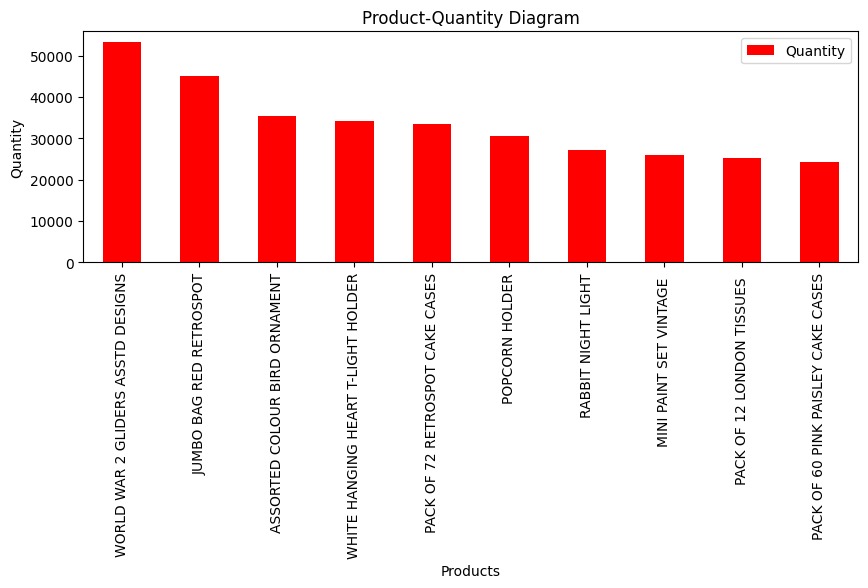

In [62]:
plotProductQuantity()

In [59]:
def plotSpentMoneyInvoiceDate():

    df["Money"]=df["Price"]*df["Quantity"]
    vis4 = df[["InvoiceDate", "Money"]]
    vis4.groupby("InvoiceDate").sum().sort_values("Money", ascending=False).head(10).plot(kind="bar",figsize=(18, 10))
    plt.title("Spent Money - InvoiceDate Diagram")
    plt.xlabel("InvoiceDate")
    plt.ylabel("Spent Money")
    plt.show()

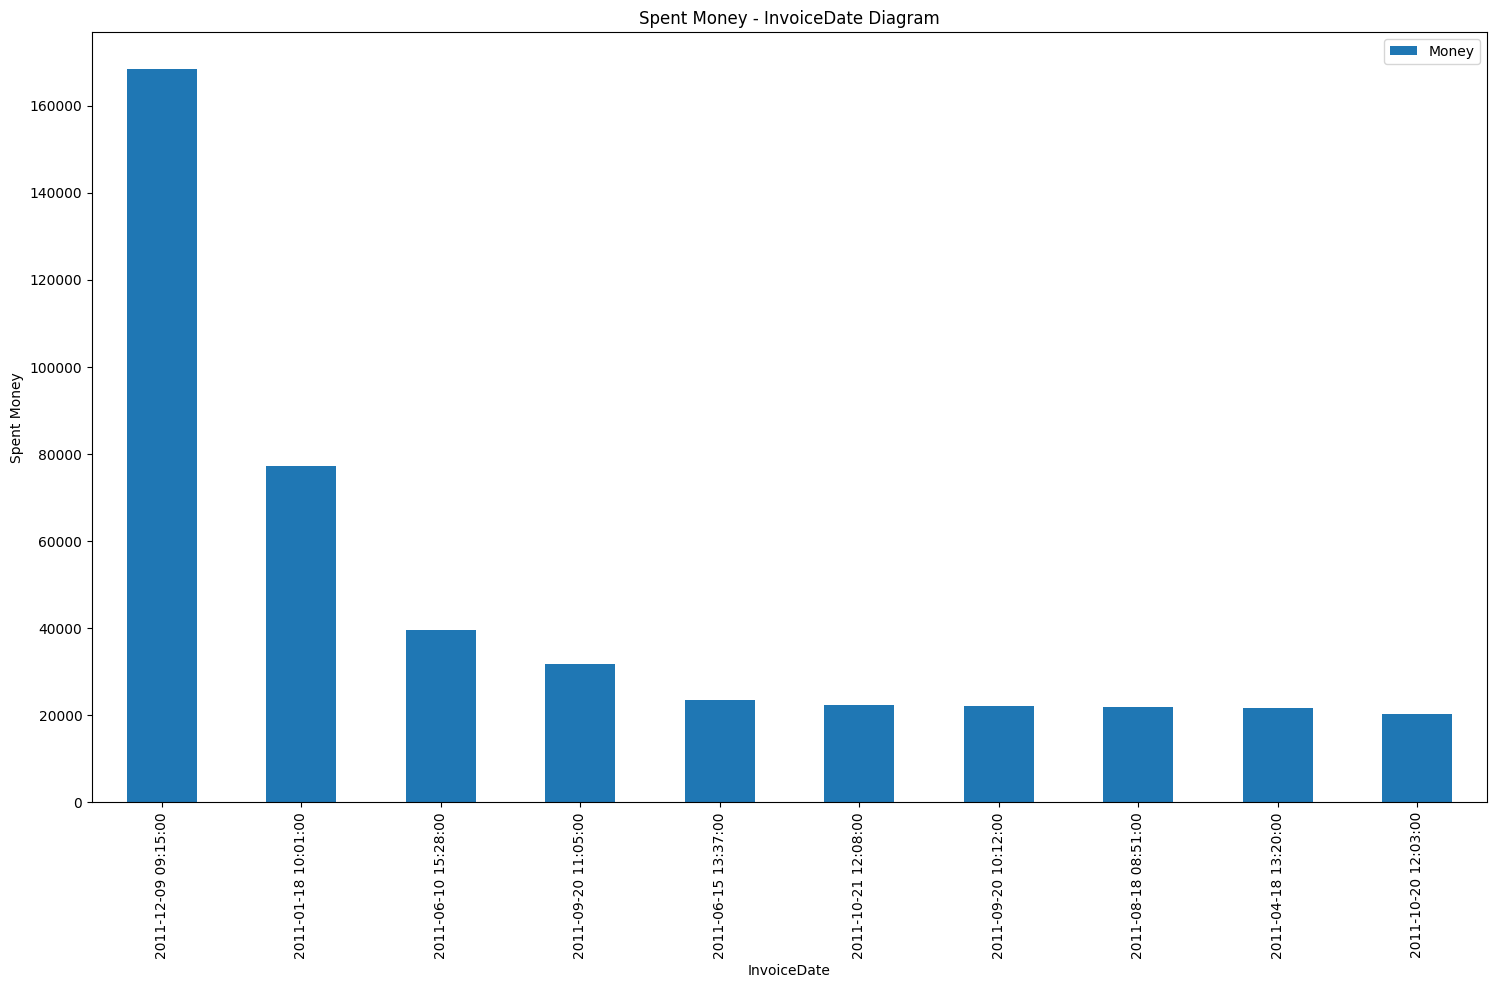

In [60]:
plotSpentMoneyInvoiceDate()

In [57]:
def plotOrderCountry():

    vis1 = df[["Country", "Invoice"]]
    vis1.drop_duplicates("Invoice")
    vis1.groupby("Country").count().sort_values("Invoice", ascending=False).head(5).plot(kind="pie",figsize=(15, 5),subplots=True)
    plt.title("Order-Country Diagram")
    plt.xlabel("Countries")
    plt.ylabel("Number of Orders")
    plt.show()

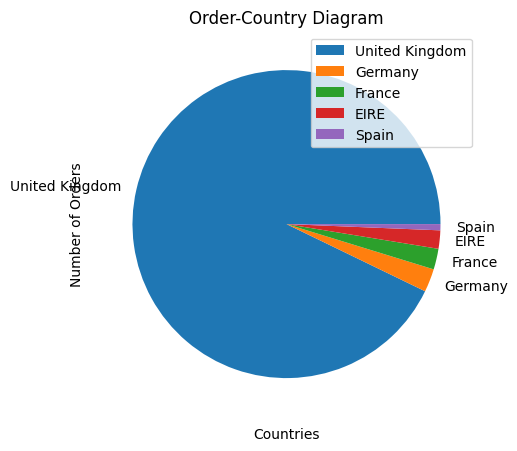

In [58]:
plotOrderCountry()


In [55]:
def plotTop10Cust():
    an=Top10CustomersWhoSpentMostMoney()
    an.plot(kind="bar",figsize=(15,5),subplots=True)
    plt.title("Top 10 Customers' IDs Who Spent the Most Money")
    plt.xlabel("Customer ID")
    plt.ylabel("Amount of Money")
    plt.show()

Here is the list of Top 10 customers who spent the most amount of  money : 


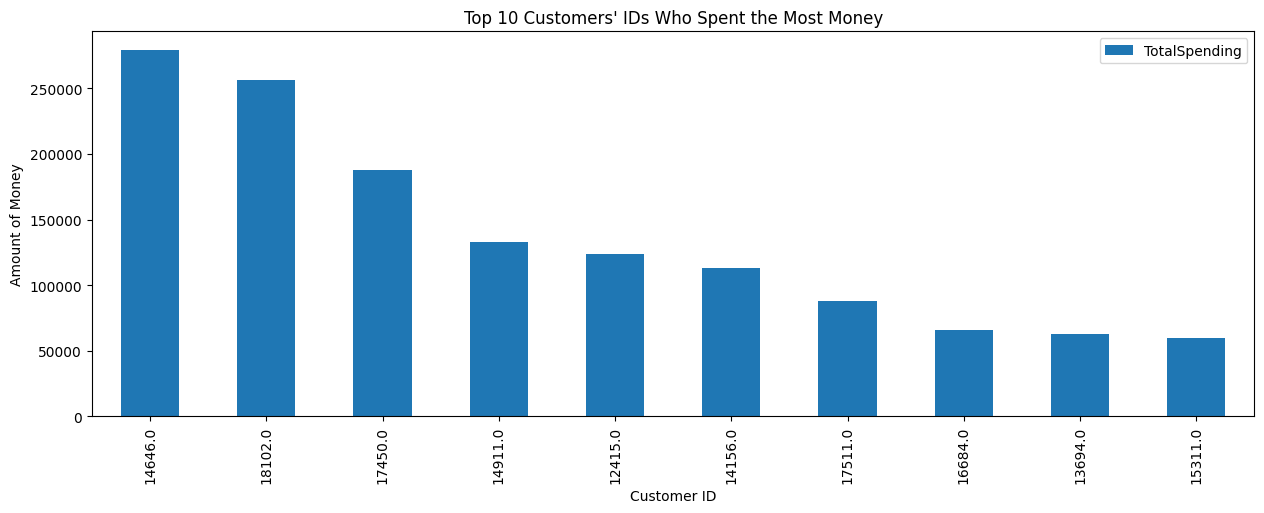

In [56]:
plotTop10Cust()

A main function for running all the functions at once

In [ ]:

def main():
    Top10Products()
    Top10CustomersWhoSpentMostMoney()
    Top5Dates()
    AverageNumbersOfOrdersEachDay()
    MostOrderedProductForSpecificDate()
    plotProductQuantity()
    plotSpentMoneyInvoiceDate()
    plotOrderCountry()
    plotTop10Cust()